# Keras Eğitimi

## Yardımcı Programları ve Eksik Kütüphaneleri Yüklemekle Başlayalım

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import coremltools
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)

Using TensorFlow backend.


keras version  2.2.4


__future__  parametresi Python 2 ve Python 3  arasındaki uyumluluğu sağlamaktadır: Örneğin Python 2 de print fonksiyonu parantezli olarak kullanılmazken, Python3'te parentez kullanılır bu sebeple özellikler arasındaki uygunluk önemlidir.Burada dahil edilen pring_function fonksiyonu python2 için print() fonksiyonunu parentezli olarak kullanabilmemize imkan verir.  

- Keras modülü ise NumPy kütphanesinden faydalanarak dizi ve matrislerin düzenlenmesine imkan verir. 
- Matplotlib kütüphanesi NumPy kütüphanesinde hesaplanan değerleri iki boyutlu(2d) olarak görselleştirmek için kullanılır.

- Kerası içe aktardıktan sonra, versiyonunu yazdırıyoruz: coremltools, 2.2.4 versiyonunu destekler ve daha yüksek bir versiyon kullanıyorsanız uyarıları oluşturabilir. Keras zaten MNIST veri setine sahip olduğu için kütüphaneye dahil ediyoruz. Ardından sonraki üç satır model bileşenlerini alır. 
- NumPy yardımcı programlarını içe aktarıyoruz ve arka planda(backend) K olarak içe aktarmalı arka uç etiketli bir etiket veriyoruz: onu image_data_format öğesini kontrol etmek için kullanacağız.

En son olarak coremltool kütüphanesini çalışma ortamına ekliyoruz. Ve Kerasın hangi versiyonunun yüklü olduğunu yazdırıyoruz.

## Artık verilerimizi yükleyip ön işlemleri yapmaya başlayalım
## Verilerimizi Eğitim(Training) ve Test/Doğrulama(Vliadation) verileri olarak içe aktarıyoruz.

`mnist.load_data()` verisini https://s3.amazonaws.com/img-datasets/mnist.npz —web sitesinden indiriyoruz.

In [2]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

- Bu işlem  verileri https://s3.amazonaws.com/img-datasets/mnist.npz adresinden indirir, veri öğelerini karıştırır ve bunları bir eğitim veri kümesi ile doğrulama veri kümesi arasında böler. 
- *Doğrulama verileri, modelin eğitim verilerine aşırı yüklenmesinin probleminin tespit edilmesinde yardımcı olur. 
- *Eğitim işlemi, doğrulama verilerinin çıktılarını hesaplamak için eğitilmiş parametreleri kullanır. Doğrulama kaybını ve doğruluğunu izlemek, doğrulama verilerinde en iyi performansı gösteren modeli kaydetmek ve doğrulama kaybı veya doğruluğu çok fazla zaman için iyileştirilemezse (muhtemelen tekrarlama) geri aramaları ayarlarız.

### X & Y verilerini kontrol edelim.
İndirme işlemi tamamlanınca bir sonraki işlemi yapalım bakalım bize nasıl sonuçlar çıkaracak.


x_train shape: (60000, 28, 28)
60000 Eğitim Veri Örnekleri
x_val shape: (10000, 28, 28)
10000 Doğrulama Veri Örnekleri
İlk birkaç X değeri
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253

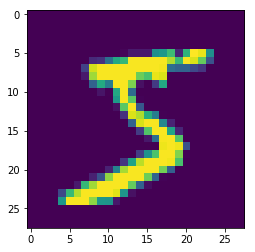

y_train shape: (60000,)
y_trainin ilk 10 Elemanı: [5 0 4 1 9 2 1 3 1 4]


In [3]:
#X' verilerini kontrol edelim (Giriş değerleri- Bağımsız değişkenler)
#Matrisin tamamını görselleştirelim (60000, 28, 28)
print('x_train shape:', x_train.shape)
#Displays (60000, 28, 28) eğitim verileri
print(x_train.shape[0], 'Eğitim Veri Örnekleri')
#Dispaly 60000 training samples
print('x_val shape:', x_val.shape)
#Display (10000, 28, 28) 
print(x_val.shape[0], 'Doğrulama Veri Örnekleri')
#Display 10000 validation samples
print('İlk birkaç X değeri\n', x_train[0])
#ilk x örneğini çizdirelim
plt.imshow(x_train[0])
plt.show()

#Y verilerini tanıtalım
print('y_train shape:', y_train.shape)
#Displays 60000
print('y_trainin ilk 10 Elemanı:', y_train[:10])

In [4]:
#X verilerini inceleyelim
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
num_classes = 10

### Giriş ve çıkış boyutlarını ayarlayalım.
MNIST verileri 28 28 piksel verilerden oluşmaktadır ve biz bu işlemlerin herbirini 0 ve 9 arasında sınıflamak istiyoruz.  
x_train.shape matrisi 3 boyutlu bir matristir; veri örnekleri numaraları, herbir verinin satır sayısı ve numarası, herbir örneğin sütun sayısı ve örnek verisini içerir.


### X verilerinini yeniden oluşturup giriş verileri olarak ayarlayalım
- Kanalları, görüntünün satırlarından ve sütunlarından önce veya sonra yerleştiriyoruz. MNIST veri örnekleri gri tonlamalıdır, bu nedenle kanal sayısı 1'dir.
- Örnek verinin giriş şeklini, kanallar doğru uçta olacak şekilde ayarlayın.

- Evrişimli sinir ağları, görüntüleri genişlik, yükseklik ve derinliğe sahip olarak düşünür. Derinlik boyutuna kanal denir ve renk bilgisi içerir. Gri tonlamalı görüntülerde 1 kanal vardır; RGB görüntüleri 3 kanala sahiptir.
- TensorFlow ve CNTK gibi Keras arka uçları, görüntü verilerini son kanal biçiminde (satırlar, sütunlar, kanallar) veya ilk kanallar biçiminde (kanallar, satırlar, sütunlar) bekler. Yeniden şekillendirme işlevi kanalları doğru konuma yerleştirir.
- Ayrıca ilk input_shape'ı kanalların doğru ucunda olacak şekilde ayarlayabiliriz.

In [5]:
# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first':  
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:  
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Tekrar oluşturulan X verilerini inceleyelim
- TensorFlow görüntü verisi formatı kanal sonudur, bu nedenle x_train.shape ve x_val.shape şimdi sonunda 1 olan yeni bir öğeye sahiptir.

In [6]:
print('x_train shape:', x_train.shape)
#X_train shape: (60000, 28, 28)
print('x_val shape:', x_val.shape)
#x_val shape : (10000, 28, 28)
print('input_shape:', input_shape)

x_train shape: (60000, 28, 28, 1)
x_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


### Şimdi Veri türlerini değiştirip ve değerleri normalize edelim.
-Model veri değerlerini belirli bir formatta ister.Çünkü MNIST görüntü veri değerleri [0, 255] aralığında uint8 türündedir, ancak Keras'ın [0, 1] aralığında float32 türündeki değerlere ihtiyacı vardır.

In [7]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 225
x_val /= 225

### Normalize edilmiş X değerlerini kontrol edelim

In [8]:
print('Normalize edilmiş X örnekleri\n', x_train[0])

Normalize edilmiş X örnekleri
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.

Yukarıdaki çıktıda görülericeği üzere artık tüm verilerimiz 0 ve 1 aralığında değerlere sahiptir.

### Y verilerinin formatını değiştirelim

y_train, 60000 öğeli 1 boyutlu bir dizidir, ancak modelin 10 kategoriyi temsil etmesi için 60000 x 10 matrisine ihtiyacı vardır.
  - Note: Aşağıdaki hücreyi birkez çalıştırmak gerekir, daha fazla çalıştırırsak farklı sonuçlar alabiliriz.

In [9]:
print('y_train shape: ', y_train.shape)
# (60000,)
print('y_train değişkeninin ilk 10 değeri:', y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print('Değişiklik yaptıktan sonraki y_train dizisi: ', y_train.shape)
# (60000, 10)

y_train shape:  (60000,)
y_train değişkeninin ilk 10 değeri: [5 0 4 1 9 2 1 3 1 4]
Değişiklik yaptıktan sonraki y_train dizisi:  (60000, 10)


### Formatı değişmiş y verilerini kontrol edelim
    -'y_train' artık, her biri görüntünün eşleştiği dizin dışındaki tüm sıfırları içeren, 10 öğeli bir dizidir.

In [10]:
print('Yeni y_train dizisi:', y_train.shape)
print('İlk 10 y elemanı\n', y_train[:10])

Yeni y_train dizisi: (60000, 10)
İlk 10 y elemanı
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Şimdi Artık Model mimarimizi oluşturabiliriz.

### İlk Modelimiz [Malireddi's Architecture](https://sriraghu.com/2017/07/06/computer-vision-in-ios-coremlkerasmnist/) Modeli

- Model mimarisi, mükemmel barbekü sosu veya peri masalı için gizli aile tarifleri gibi bir simya şeklidir yani bir yemek tarifide diyebiliriz. Sıradan bir tarif ile işleme başalayabilir ve  daha sonra girdi verilerinizdeki simetrilerden yararlanmak için ince ayar yapabiliriz veya belirli özelliklere sahip bir model üretmek için kullanabilirsiniz.

- İşte iki araştırmacının modelleri: Sri Raghu Malireddi ve Keras'ın yazarı François Chollet. Chollet'ın modeli genel amaçlıdır ve Malireddi'nin modeli ise, mobil uygulamalar için uygun küçük bir model üretmek üzere tasarlanmıştır.

In [11]:
#Malireddi'nin Mimarisi
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
model_m.add(MaxPooling2D(pool_size =(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation = 'relu'))
model_m.add(MaxPooling2D(pool_size =(2, 2)))
model_m.add(Dropout(0,2))
model_m.add(Conv2D(128, (1, 1), activation = 'relu'))
model_m.add(MaxPooling2D(pool_size =(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation = 'relu'))
model_m.add(Dense(num_classes, activation ='softmax'))
#Model katmanlarını, çıkış şekillerini, eğitilebilir parametreleri kontrol edelim.
print(model_m.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [12]:
#Cholettes'nin Mirarisi (Modeli)
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
model_c.add(Conv2D(64, (3, 3), activation = 'relu'))
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes, activation = 'softmax'))
print(model_c.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

### [Chollet's Architecture](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)

- Modelden de görüldüğü üzere Malireddi’nin mimarisi Chollet’ten daha çok evrişimli katmana (Conv2D) sahip olsa da, Malireddi'nin modeli çok daha hızlı çalışıyor ve ortaya çıkan model boyutu çok daha küçük.

- Sonuç olarak, Toplam parametre büyüklüğü farkının ana nedenidir:
    - Chollet’in 1.199.882’si, Malireddi’nin 94.602’sinin 12.5 katıdır. Ve bu tam olarak model boyutundaki farktan kaynaklanmaktadır: 4.8MB ve 380KB.
    - Malireddi’nin modelinde, her biri katmanın genişliğini ve yüksekliğini yarıya indiren bir MaxPooling2D katmanı izleyen üç Conv2D katman var. Bu, ilk yoğun katman için parametre sayısının Chollet’ten daha küçük olmasını sağlar ve Malireddi’nin modelinin neden daha küçük olduğunu ve daha hızlı çalıştığını açıklar. Konvolüsyon katmanlarının uygulanması oldukça optimize edilmiştir, *bu nedenle ek konvolüsyon katmanı eğitim süresine fazla bir şey eklemeden doğruluğu arttırır.* Ancak daha küçük olan yoğun katman Chollet’ten çok daha hızlı çalışır.
    
- Siz bir sonraki adımdaki işlemin(eğitim süresinin bitmesini beklerken) açıklamalar bölümünde, katmanları, çıktı şeklini ve parametre numaralarını anlatacağız.


## Artık Modelimizi Eğitebiliriz

### Öncelikle Callbacks List fonksiyonu tanımlayalım
- Callbacks fornksiyonu, eğitim işlevi için isteğe bağlı bir argümandır, bu nedenle önce callbacks fonksiyonunu tanımlayın.

    - Bir epoch(döngü), veri kümesindeki tüm mini gruplar boyunca tam bir geçiş işlemidir.
    - *ModelCheckpoint* callback için, doğrulama kaybı değerini izler, modeli bugüne kadarki en düşük değere sahip bir dosyada epoch numarası ve dosya adındaki doğrulama kaybı ile kaydeder.
    - *EarlyStopping* geri çağırma(callback) eğitimin doğruluğunu izler: ardışık iki döngü(epoch) için gelişme olmazsa, eğitim erken durur. Deneylerime göre, bu asla olmadı: acc bir epoch(döngü) düşerse, her zaman diğer döngüde düzeliyor.

In [13]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor = 'val_loss', save_best_only =True),
    keras.callbacks.EarlyStopping(monitor ='acc', patience=1)
]

### Modeli Eğitelim

    - Benim eğitim işlem süresi MacBook Pro'da  yaklaşık 15 dakika sürdü. İşlem boyutunu küçültmek veya epochları(döngü) artırmak, çalışma süresini uzatacaktır.
    - Modelin doğruluğunu artırmak için bu hücreyi bir kereden fazla çalıştırabilirsiniz.
    - Erken elle durdurmak için araç çubuğundaki durdur düğmesini tıklayabilirsiniz.

- Eğer bir GPU ile eğitimi yapma imkanınız yoksa, bu adım için Malireddi'nin model_m'sini kullanmanızı öneririm, çünkü Chollet'in model_c'sinden daha hızlı çalışır: MacBook Pro'mda, 76-106s / epoch vs. 246-309s / epoch veya yaklaşık 15 dakika & 45 dakika.

        {- Not: İlk döngü bittikten sonra bir .h5 dosyası not defterinde görünmüyorsa, çekirdeği kesmek için durdur düğmesini, kaydet düğmesini ve oturumu kapat düğmesini tıklayın. Terminal'de sunucuyu durdurmak için Control-C tuşlarına basın, ardından docker çalıştır komutunu yeniden çalıştırın. URL'yi veya belirteci tarayıcıya veya giriş sayfasına yapıştırın, not defterine gidin ve "Güvenilir Değil" düğmesini tıklayın bunu "Güvenilir- Trusted" olarak değiştirin. Bu hücreyi seçin, ardından menüden Hücre \ Yukarıda Tümünü Çalıştır'ı seçin.}

- Aşağıdaki kodu girin ve çalıştırın. Bu biraz zaman alacaktır, bu yüzden beklerken Açıklamalar bölümünü okuyabilirsiniz. Ancak notebook'un .h5 dosyalarını kaydettiğinden emin olmak için birkaç dakika sonra Finder'ı kontrol edin.

In [14]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model_m.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.5227 - acc: 0.8294 - val_loss: 0.1322 - val_acc: 0.9584
Epoch 2/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.1464 - acc: 0.9537 - val_loss: 0.0728 - val_acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 55s 917us/step - loss: 0.1044 - acc: 0.9674 - val_loss: 0.0550 - val_acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.0862 - acc: 0.9735 - val_loss: 0.0504 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 59s 975us/step - loss: 0.0730 - acc: 0.9765 - val_loss: 0.0417 - val_acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 54s 900us/step - loss: 0.0678 - acc: 0.9783 - val_loss: 0.0350 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 54s 907us/st

## Evrişimli Sinir Ağları (Convolutional Neural Network)
- Bir MNIST sınıflandırıcı oluşturmak için hemen hemen her ML yaklaşımını kullanabiliriz, ancak bu eğitimde bir evrişimsel sinir ağı (CNN) kullanılıyor, çünkü bu TensorFlow ve Keras'ın temel gücüdür.

- Evrişimli sinir ağları girdileri görüntü olarak kabul eder ve nöronları üç boyutlu genişlik, yükseklik, derinlik olarak düzenler:. Bir CNN, her biri eğitim görüntülerinin daha üst düzey özelliklerini algılayan evrişimli katmanlardan oluşur: 
    - birinci katman, çeşitli açılardaki kısa çizgileri veya yayları tespit etmek için filtreler yetiştirebilir;
    - ikinci katman, bu çizgilerin önemli kombinasyonlarını tespit etmek için filtreleri eğitir;
    - son katmanın filtreleri, önceki katmanlara göre görüntüyü sınıflandırmak için kullanılır.
   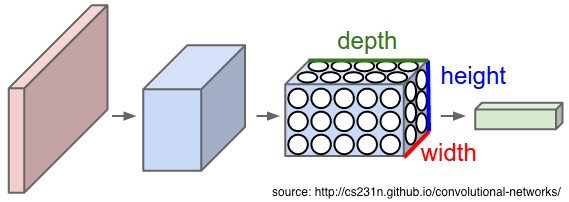
  
    - Her konvolüsyon tabakası, çekirdeğin altındaki giriş birimlerinin ağırlıklı toplamını hesaplayarak girişin üzerine küçük bir kare çekirdek - 1 × 1, 3 × 3 veya 5 × 5 - geçer. Bu evrişim sürecidir.
   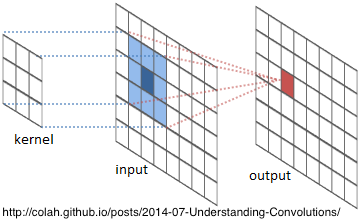
   
   Her bir nöron önceki katmandaki sadece 1, 9 veya 25 nörona bağlanır, bu nedenle birden fazla girişe bağlı olmak  iki nöron arasında uyum sağlama tehlikesi doğurur ve bu durum fazla uydurmaya neden olabilir. Bu yüzden CNN'ler, birlikte adapte olma ve fazla uydurma(overfited) karşı koymak için havuzlama(pooling) ve bırakma(dropout) katmanları içerir. Bunları aşağıda açıklayacağız.

### Sample Model
Malireddi'nin modeline tekrar bakalım.

In [15]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))

### Gelin Yukarıdaki modelde olanları anlamaya çalışalım.

    - Ardışık(Sequential)
    - Önce boş bir Sıralı model oluşturup ardından doğrusal bir katman yığını ekliyoruz: katmanlar modele eklendikleri sırayla çalışır. Keras belgelerinde birkaç Sıralı model örneğine bakabilirsiniz.

[link](https://keras.io/getting-started/sequential-model-guide/#examples)

        - Not: Keras ayrıca çoklu çıktı modelleri, yönlendirilmiş asiklik grafikler veya paylaşımlı katmanlara sahip modeller gibi karmaşık modelleri tanımlamak için işlevsel bir API'ye sahiptir.

- İlk katman, MNIST için olan (28, 28, 1) giriş şekli hakkında bilgi sahibi olmalıdır. Diğer katmanlar giriş şekillerini önceki katmanın çıktı şeklinden çıkarırlar. Model özetinin çıktı şekli bölümü:

    Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)         8320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      

## Conv2D
Bu modelde üç tane  Conv2D katmanı bulunmaktadır:
    - Conv2D(32, (5, 5), input_shape=input_shape, activation='relu')
    - Conv2D(64, (3, 3), activation='relu')
    - Conv2D(128, (1, 1), activation='relu')

    - *İlk parametre*  - 32, 64, 128 - tespit etmek için bu katmanı eğitmek istediğiniz filtre veya özelliklerin sayısıdır. Bu aynı zamanda çıkış şeklinin derinliği - son boyutudur.
    - İkinci parametre - (5, 5), (3, 3), (1, 1) - çekirdek boyutu: giriş alanı üzerinde kayan evrişim penceresinin genişliğini ve yüksekliğini belirten bir demet, ağırlıklı toplamları hesaplamak - nokta çekirdek ağırlığının ürünleri ve giriş birimi değerlerini belirler.
    - Üçünncü parametre ise aktivasyon ( = 'relu' ReLU (Rectified Linear Unit) fonksiyonunu belirtir. Çekirdek bir giriş birimine ortalandığında, birim toplam ağırlıklı bir eşik değerden büyükse aktive edildiği veya işlem yapıldığı söylenir: weighted_sum> eşik. 
    - Önyargı değeri - eşiktir: birim, ağırlıklı_sum + önyargı> 0 olduğunda işlem yapar. 
    - Modelin eğitimi, her bir filtre için çekirdek ağırlıklarını ve önyargı değerini hesaplar. 
    - ReLU, derin sinir ağları için en popüler aktivasyon fonksiyonudur.
     
## MaxPooling2D 
MaxPooling2D(pool_size=(2, 2))

    - Havuzlama katmanı, nxm değerlerini maksimum değerleriyle değiştirerek önceki katman boyunca n-sütunlar halinde bir n satır kaydırır. Havuz filtreleri genellikle karedir: n = m. Aşağıda gösterilen en yaygın kullanılan 2 x 2 havuz filtresi, önceki katmanın genişliğini ve yüksekliğini yarıya indirir, böylece fazla öğrenme(overfitting) kontrol etmeye yardımcı olan parametre sayısını azaltır.
   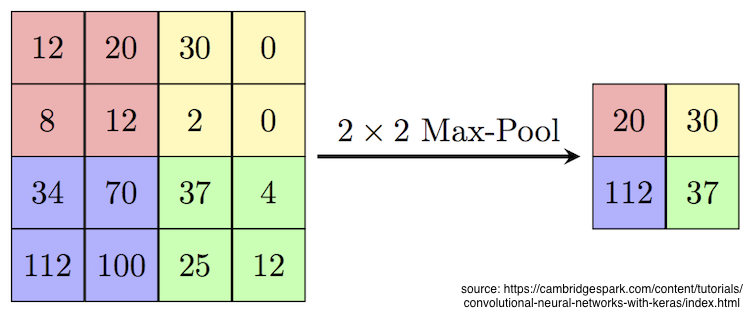

    - Malireddi’nin modelinde, her katlamalı katmanın ardından bir havuz katmanı vardır ve bu da son model boyutunu ve eğitim süresini büyük ölçüde azaltır.
    -  Chollet’in modelinin havuza girmeden önce iki katlanır katmanı var. Bu, evrişimli tabakaların,  değerlerin% 75'ini atmadan önce  yani havuz oluşturmadan önce daha karmaşık özellikler geliştirmesine olanak sağladığı için daha büyük ağlar için önerilir.
 
- *Conv2D ve MaxPooling2D parametreleri, her katmanın çıktı şeklini ve eğitilebilir parametre sayısını belirler:*
     - Çıkış Şekli = (giriş genişliği - çekirdek genişliği + 1, giriş yüksekliği - çekirdek yüksekliği + 1, filtre sayısı)
- Her satır ve sütundaki ilk ve son birimlerin üzerinde 3 × 3 bir çekirdeği ortalayamazsınız, bu nedenle çıktı genişliği ve yüksekliği girişten 2 piksel daha az olur. 5 × 5 bir çekirdek çıktı genişliğini ve yüksekliğini 4 piksel azaltır.

    - Conv2D(32, (5, 5), input_shape=(28, 28, 1)): (28-4, 28-4, 32) = (24, 24, 32)
    - MaxPooling2D halves the input width and height: (24/2, 24/2, 32) = (12, 12, 32)
    - Conv2D(64, (3, 3)): (12-2, 12-2, 64) = (10, 10, 64)
    - MaxPooling2D halves the input width and height: (10/2, 10/2, 64) = (5, 5, 64)
    - Conv2D(128, (1, 1)): (5-0, 5-0, 128) = (5, 5, 128)

#### Param = filtre sayısı x (çekirdek genişliği x çekirdek yüksekliği x giriş derinliği + 1 önyargı)
    - Conv2D(32, (5, 5), input_shape=(28, 28, 1)): 32 x (5x5x1 + 1) = 832
    - Conv2D(64, (3, 3)): 64 x (3x3x32 + 1) = 18,496
    - Conv2D(128, (1, 1)): 128 x (1x1x64 + 1) = 8320

{ Ödev: Chollet’in mimari modeli_c için çıktı şekillerini ve parametre numaralarını hesaplayın.}


#### Dropout
Dropout(0.5)
Dropout(0.2)

    - Bir bırakma katmanı genellikle bir havuz katmanı ile eşleştirilir. Girdi birimlerinin bir kısmını rastgele olarak 0'a ayarlar. Bu aşırı uyumu kontrol altına almak için başka bir yöntemdir: nöronların komşu nöronlardan çok fazla etkilenmesi daha olası değildir, çünkü bunların herhangi biri rastgele ağdan düşebilir. Bu, şebekeyi girdideki küçük değişikliklere karşı daha az hassas hale getirir, bu nedenle yeni girdilere genelleme olasılığı daha yüksektir.
    - Aurélien Géron, Scikit-Learn & TensorFlow ile Uygulamalı Makine Öğreniminde, bunu herhangi bir günde insanların yüzdesinin çalışmaya gelmeyebileceği bir işyeriyle karşılaştırır: herkes kritik işler yapmak zorunda kalacak, ve daha fazla iş arkadaşı ile işbirliği yapmak zorunda kalacaktı. Bu, şirketi daha dayanıklı ve daha az bekar bir işçiye bağımlı hale getirecektir.
 
#### Flatten(Düzleştirme)
    - Düzleştirme: Evrişimli tabakalardan gelen ağırlıklar, tamamen bağlanmış Yoğun tabakaya geçmeden önce 1 boyutlu - düzleştirilme - yapılmalıdır.
    
- model_m.add(Dropout(0.2))
- model_m.add(Flatten())
- model_m.add(Dense(128, activation='relu'))
    - Önceki katmanın çıkış şekli (2, 2, 128), bu nedenle Flatten () çıkışı 512 elemanlı bir dizidir.

#### Dense
    - Dense(128, activation='relu')
    - Dense(num_classes, activation='softmax')
 
 - Evrişimli bir tabakadaki her bir nöron, önceki tabakadaki sadece birkaç nöronun değerlerini kullanır. Tamamen bağlı bir katmandaki her nöron, önceki katmandaki tüm nöronların değerlerini kullanır. Bu tür bir katmana Keras'ta adı Yoğun(Dense) denir.
 
 - Yukarıdaki model özetlerine baktığımızda, Malireddi’nin ilk Yoğun katmanı 512 nörona sahipken, Chollet’in modeli 9216 sahip. Her ikisi de 128-nöron çıkış katmanı üretiyor, ancak Chollet’ler Malireddi’den 18 kat daha fazla parametre hesaplamalı. İşte eğitim süresinin çoğunu kullanan da budur.
 
 *Çoğu CNN mimarisi, bir veya daha fazla Yoğun katman ve ardından çıktı katmanıyla sona erer.*
 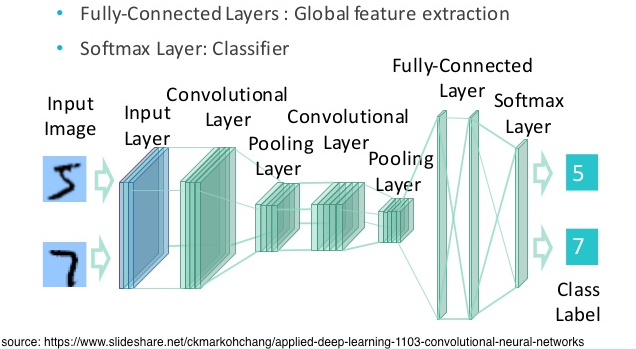
 
    - İlk parametre katmanın çıktı boyutu. Son çıkış katmanı, 10 basamak sınıfına karşılık gelen 10 çıkış boyutuna sahiptir.
    - Softmax aktivasyon fonksiyonu, 10 çıkış sınıfı üzerinde olasılık dağılımı üretir. Giriş değerini [0, 1] değerine ölçeklendiren sigmoid fonksiyonunun bir genellemesidir. MNIST sınıflandırıcınız için softmax, 10 değerin her birini [0, 1] içine ölçeklendirir, böylece 1'e kadar ekler.
    - Sigmoid işlevini tek bir çıktı sınıfı için kullanırız: örneğin, Aşağıdaki resim için bunun iyi bir köpeğin fotoğrafı olma olasılığını anlamaya çalışırız.
    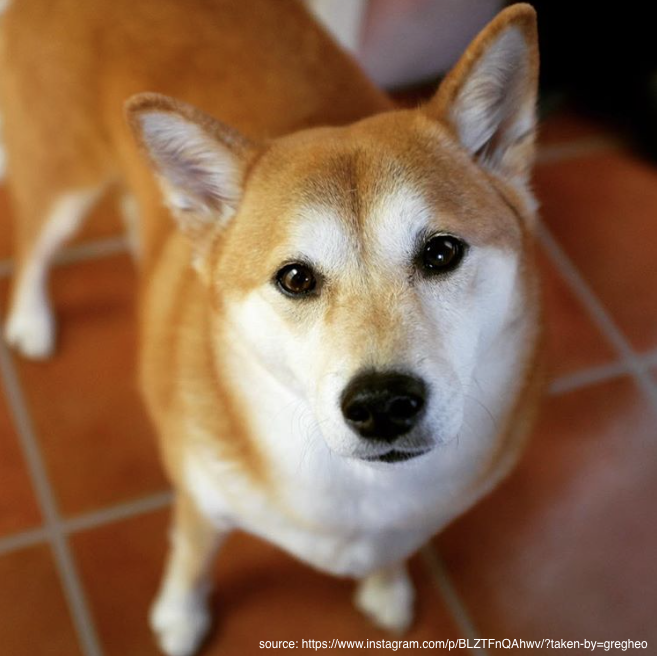

#### Derleme 

*model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])*

 - *Kategorik crossentropi kaybı fonksiyonu* CNN tarafından hesaplanan olasılık dağılımı ile etiketlerin gerçek dağılımı arasındaki mesafeyi ölçer.
 - *Optimize edici*(Optimizer), gradyanı tam doğru hızda izleyerek kayıp fonksiyonunu en aza indirmeye çalışan stokastik gradyan iniş algoritmasıdır.
 - *Doğruluk*(Accuracy) - doğru sınıflandırılan görüntülerin oranı - eğitim ve test sırasında izlenen en yaygın ölçümdür.

#### Fit
batch_size = 256
epochs = 10
model_m.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks_list,
            validation_data=(x_val, y_val), verbose=1)
            
    - *Parti büyüklüğü(Batch Size)*, mini parti stokastik gradyan uydurması için kullanılacak veri öğesi sayısıdır. Bir parti büyüklüğünün seçilmesi, bir zar zarfı, deneme yanılma meselesidir. Daha küçük değerler, dönemlerin daha uzun sürmesini sağlar; daha büyük değerler GPU paralelliğini daha iyi kullanır ve veri aktarım süresini azaltır, ancak çok büyük olması, hafızanızın tükenmesine neden olabilir.

     - Epoch sayısı da zarın bir benzeridir. Her Epoch(döngü), kayıp ve doğruluk ölçümlerini iyileştirmelidir. Daha fazla Epoch daha doğru bir model üretmelidir, ancak eğitim daha uzun sürer. Çok fazla Epoch, fazla uydurma ile sonuçlanabilir. Tüm dönemleri tamamlamadan önce modelin geliştirilmesi durursa, erken durması için bir geri arama ayarlayabiliriz. Notebook'ta, modeli geliştirmeye devam etmek için uygun hücreyi yeniden çalıştırabilirsiniz.
     - Verileri yüklediğinizde, 10000 öğe doğrulama verileri olarak ayarlandı. Bu argümanı geçmek, eğitim sırasında doğrulamayı mümkün kılar, böylece doğrulama kaybını ve doğruluğunu izleyebilirsiniz. Bu değerler eğitim kaybından ve hassasiyetinden daha kötüyse, bu modelin fazladan eğitildiğinı gösterir.
     
     -Verbose
        - 0 = sessiz, 1 = ilerleme çubuğu, 2 = Epoch başına bir satır.
 #### Sonuçlar(Results)
 -  Eğitim işlemlerinden birinin sonucu:
 Epoch 1/10
60000/60000 [==============================] - 106s - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0216 - val_acc: 0.9940
Epoch 2/10
60000/60000 [==============================] - 100s - loss: 0.0271 - acc: 0.9911 - val_loss: 0.0199 - val_acc: 0.9942
Epoch 3/10
60000/60000 [==============================] - 102s - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0228 - val_acc: 0.9931
Epoch 4/10
60000/60000 [==============================] - 101s - loss: 0.0257 - acc: 0.9913 - val_loss: 0.0211 - val_acc: 0.9935
Epoch 5/10
60000/60000 [==============================] - 101s - loss: 0.0256 - acc: 0.9916 - val_loss: 0.0222 - val_acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 100s - loss: 0.0263 - acc: 0.9913 - val_loss: 0.0178 - val_acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 87s - loss: 0.0231 - acc: 0.9920 - val_loss: 0.0212 - val_acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 76s - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0212 - val_acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 76s - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0220 - val_acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 76s - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0203 - val_acc: 0.9935

    - Her Epoch'ta, kayıp değerleri düşmeli ve doğruluk değerleri artmalıdır. ModelCheckpoint geri çağrısı(callback), Epochlar: 1, 2 ve 6'yı kurtarır, çünkü Epochlar 3, 4 ve 5'teki doğrulama kaybı değerleri, Epoch 2'den daha yüksektir ve dönem 6'dan sonra doğrulama kaybında bir gelişme yoktur. iki ardışık dönem için azalır.
 
     - Not: Aslına bakarsanız, bu sonuçlar 20 veya 30 dönemin sonucudur: Fit hücreyi, modeli sıfırlamadan bir kereden fazla koştum, bu nedenle, kayıp ve doğruluk değerleri zaten çağ 1'de bile oldukça iyi durumda. Ancak ölçümlerde biraz dalgalanma görüyorsunuz. örneğin, 4, 6 ve 9 çağlarında doğruluk azalır.

- Artık modeliniz eğitimi bitirdi, kodlamaya geri dönebiliriz!

### Core ML Modeline Dönüştür
Eğitim adımı tamamlandığında, not defterine kaydedilmiş birkaç modeliniz olmalıdır. En yüksek çağ numarasına (ve en düşük doğrulama kaybına sahip) en iyi modeldir, bu nedenle bu dosya adını convert işlevinde kullanın.
Aşağıdaki kodu girin ve çalıştırın.

    - output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        coreml_mnist = coremltools.converters.keras.convert(
    'best_model.09-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')

 - Burada 10 çıkış etiketini bir diziye ayarladınız ve bunu class_labels argümanı olarak iletiyorsunuz. Çok sayıda çıktı sınıfına sahip bir model eğitiyorsanız, etiketleri bir metin dosyasına, her satıra bir etiket koyun ve class_labels argümanını dosya adına ayarlayın.
 
 - Parametre listesinde, girdi ve çıktı adları girin ve image_input_names = 'image' olarak ayarlayın, böylece Core ML modeli bir görüntüyü çoklu dizi yerine girdi olarak kabul eder.
 
 - Core ML modelini inceleyin
Bu satıra girin ve çıktısını görmek için çalıştırın.


In [16]:
output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# For the first argument, use the filename of the newest .h5 file in the notebook folder.
coreml_mnist = coremltools.converters.keras.convert(
    'best_model.09-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')

0 : conv2d_1_input, <keras.engine.input_layer.InputLayer object at 0xd367d85f8>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0xd367d85c0>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0xd36b28f60>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0xd367d8a20>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0xd36804d68>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0xd36c03c88>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0xd368254e0>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0xd36a5a978>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0xd36c03080>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0xd36a73908>
10 : flatten_1, <keras.layers.core.Flatten object at 0xd36a94c88>
11 : dense_1, <keras.layers.core.Dense object at 0xd36a73860>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0xd36c03748>
13 : dense_2, <

In [17]:
print(coreml_mnist)

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"



## Convert to Core ML Model

### Core ML modeli kontrol edelim
Giriş veri tipinin 'imageType' olduğunu kontrol edelim, bu çok boyutlu dizi olmamalı buna dikkat edelim.

In [18]:
print(coreml_mnist)

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"



### Xcode'a oluşturduğumuz modeli ekleyelim.

- Şimdi ilk iki öğe için kendi adınızı ve lisans bilgilerinizi kullanarak aşağıdakileri ekleyin ve çalıştırın.

- Bu bilgi, modeli Xcode’un Proje gezgininde seçtiğinizde görünür.

- Core ML Modelini Kaydet
- Son olarak, aşağıdakileri ekleyin ve çalıştırın.

In [19]:
coreml_mnist.author = 'sait'
coreml_mnist.license = 'sa'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.input_description['image'] = 'Digit image'
coreml_mnist.output_description['output'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'

### Save the Core ML Model

In [20]:
coreml_mnist.save('MNISTClassifier.mlmodel')

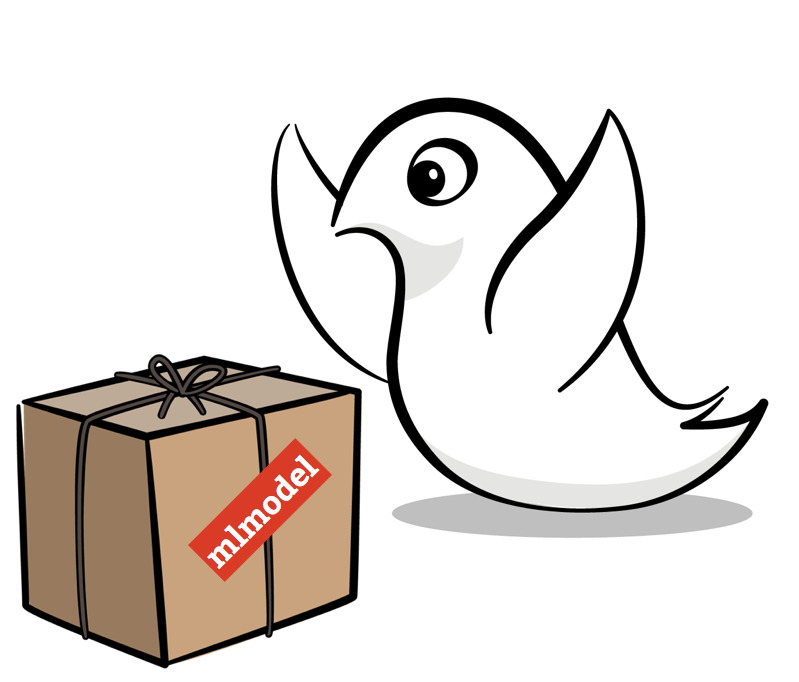

### İOS Uygulamasında Modeli Kullan
Şimdi sadece iOS 11 Eğitiminde Core ML ve Vision: Machine Learning'de açıklanan prosedürü izleyin. Adımlar aynı, ancak Apple’ın örnek uygulaması Image Classification ile Vision ve CoreML ile eşleşecek şekilde kodu yeniden düzenledim.

#### Adım 1. Modeli uygulamaya sürükleyin:
Başlangıç uygulamasını Xcode'da açın ve MNISTClassifier.mlmodel'i Finder'dan projenin Proje yönlendiricisine sürükleyin. Eklediğiniz meta verileri görmek için seçin:

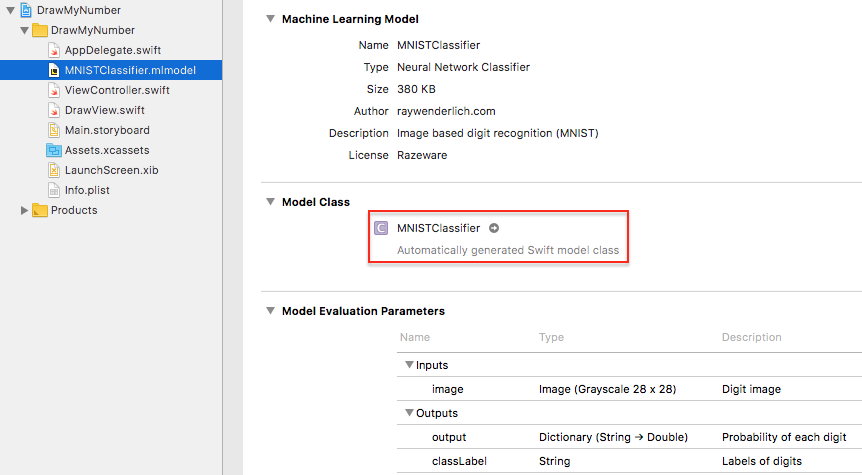

Otomatik olarak oluşturulan Swift model sınıfı yerine, model sınıfını oluşturmak için projeyi inşa etmeyi söylüyorsa, devam et ve bunu yap.

#### Adım 2. CoreML ve Vision çerçevelerini içe aktarın:
ViewController.swift'i açın ve UIKit'in hemen altındaki iki çerçeveyi içe aktarın:
- import CoreML
- import Vision

#### Adım 3. VNCoreMLModel ve VNCoreMLRequest nesneleri oluşturun:
Satış noktalarının altına aşağıdaki kodu ekleyin:

lazy var classificationRequest: VNCoreMLRequest = {
  // Load the ML model through its generated class and create a Vision request for it.
  do {
    let model = try VNCoreMLModel(for: MNISTClassifier().model)
    return VNCoreMLRequest(model: model, completionHandler: handleClassification)
  } catch {
    fatalError("Can't load Vision ML model: \(error).")
  }
}()

func handleClassification(request: VNRequest, error: Error?) {
  guard let observations = request.results as? [VNClassificationObservation]
    else { fatalError("Unexpected result type from VNCoreMLRequest.") }
  guard let best = observations.first
    else { fatalError("Can't get best result.") }

  DispatchQueue.main.async {
    self.predictLabel.text = best.identifier
    self.predictLabel.isHidden = false
  }
}


    - İstek nesnesi, 4. Adımdaki işleyicinin kendisine ilettiği herhangi bir görüntü için çalışır, bu nedenle yalnızca bir kez tembel var olarak tanımlamanız gerekir.
            İstek nesnesinin tamamlanma işleyicisi istek ve hata nesnelerini alır. Request.results öğesinin bir 
            - VNClassificationObservation nesnesi dizisi olduğunu kontrol edersiniz, bu, Core ML modeli bir öngörücü veya görüntü işlemcisi yerine bir sınıflandırıcı olduğunda Vision çerçevesinin döndürdüğü şeydir.
- Bir VNClassificationObservation nesnesi iki özelliğe sahiptir: tanımlayıcı - bir Dize - ve güven - 0 ile 1 arasında bir sayı - sınıflandırmanın doğru olma olasılığı. En yüksek güven değerine sahip olan ilk sonucu alırsınız ve predictLabel'i güncellemek için ana kuyruğa geri gönderilir. Sınıflandırma işi ana kuyruğunda gerçekleşir, çünkü yavaş olabilir.


#### Adım 4. Bir VNImageRequestHandler oluşturun ve çalıştırın:
PredictTapped () öğesini bulun ve print deyimini aşağıdaki kodla değiştirin:

- İnputImage'dan bir CIImage oluşturun, sonra bu ciImage için VNImageRequestHandler nesnesini oluşturun ve işleyiciyi bir VNCoreMLRequest nesnelerinin bir dizisinde çalıştırın - bu durumda, yalnızca 3. Adımda oluşturduğunuz bir istek nesnesini çalıştırın.
- İnşa et ve çalıştır. Çizim alanının ortasına bir rakam çizin, ardından Tahmin et'e dokunun. Tekrar denemek için Temizle'ye dokunun.

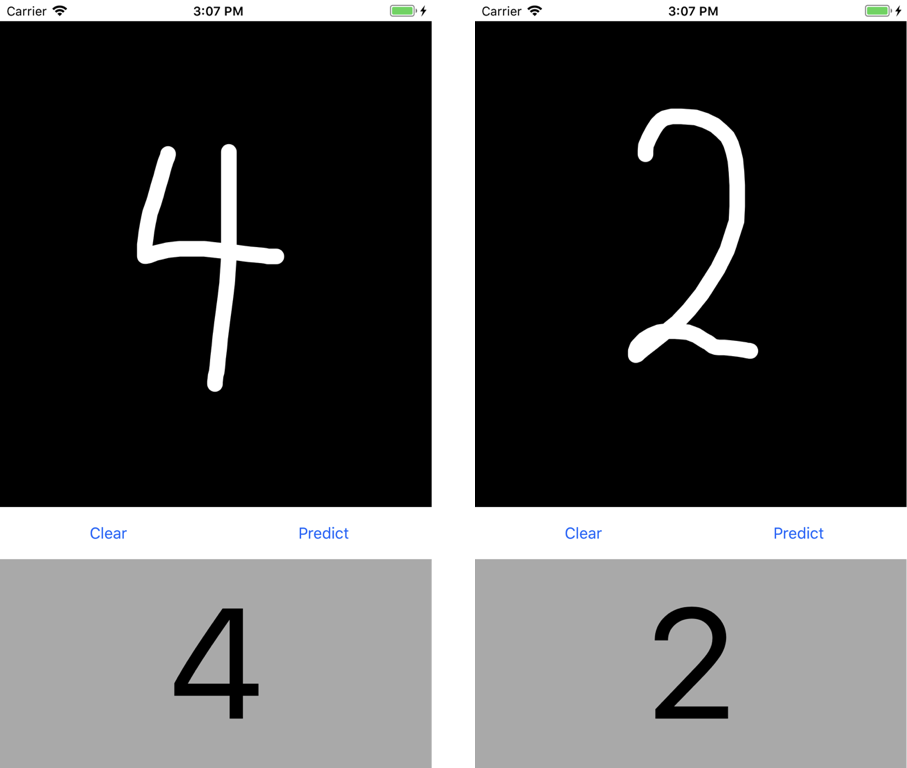
 - Daha büyük çizimler daha iyi çalışma eğilimindedir, ancak model genellikle ‘7’ ve ‘4’ ile sorun yaşar. Şaşırtıcı değil, MNIST verilerinin bir PCA görselleştirmesi olarak 9s ile kümelenmiş 7s ve 4s'leri gösteriyor
 
         - Not: Malireddi, Vision çerçevesinin% 20 daha fazla CPU kullandığını söylüyor, bu yüzden uygulaması bir UIImage nesnesini CVPixelBuffer formatına dönüştürmek için bir uzantı içeriyor.
        - Vision kullanmıyorsanız, Keras modelini Core ML'ye dönüştürdüğünüzde, parametre olarak image_scale = 1 / 255.0 değerini ekleyin: Keras modeli, [0, 1] aralığında gri skala değerleri olan görüntüler üzerinde çalışır ve CVPixelBuffer değerleri [0, 255] aralığında.
        

[Bu Eğitim için faydalanılan kaynak](https://www.raywenderlich.com/188-beginning-machine-learning-with-keras-core-ml)